# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data



In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

In [3]:
df_tesla.shape

(124, 3)

In [4]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [5]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [6]:
df_tesla.tail()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007
123,2020-09-01,31,407.339996


In [7]:
min_tesla = df_tesla['TSLA_WEB_SEARCH'].min()

In [8]:
max_tesla = df_tesla['TSLA_WEB_SEARCH'].max()

In [9]:
print(f'Largest value for Tesla in Web Search: {min_tesla} ')
print(f'Smallest value for Tesla in Web Search: {max_tesla}')

Largest value for Tesla in Web Search: 2 
Smallest value for Tesla in Web Search: 31


Periodicity of the time series data is monthly.
A value of 100 in the search column means peak popularity.

### Unemployment Data

In [10]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [11]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [12]:
df_unemployment.tail()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
176,2018-09,14,3.7
177,2018-10,15,3.8
178,2018-11,16,3.7
179,2018-12,17,3.9
180,2019-01,21,4.0


In [13]:
unemployment_max = df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()

In [14]:
print('Largest value for "Unemployment Benefits" '
      f'in Web Search: {unemployment_max}')

Largest value for "Unemployment Benefits" in Web Search: 100


### Bitcoin

In [15]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [16]:
btc_search_max = df_btc_search['BTC_NEWS_SEARCH'].max()

In [17]:
print(f'largest BTC News Search: {btc_search_max}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

In [18]:
df_tesla.isna().values.any()

False

In [19]:
df_unemployment.isna().values.any()

False

In [20]:
df_btc_search.isna().values.any()

False

In [21]:
print(f'Missing values for Tesla?: 0')
print(f'Missing values for U/E?: 0 ')
print(f'Missing values for BTC Search?: 0')

Missing values for Tesla?: 0
Missing values for U/E?: 0 
Missing values for BTC Search?: 0


In [22]:
print(f'Missing values for BTC price?:{df_btc_price.isna().values.sum()} ')

Missing values for BTC price?:2 


In [23]:
print(f'Number of missing values: {df_btc_price[df_btc_price.CLOSE.isna()]}')

Number of missing values:             DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN


In [24]:
df_btc_price = df_btc_price.dropna()

### Converting Strings to DateTime Objects

In [25]:
type(df_btc_price.DATE[1])

str

In [26]:
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [27]:
type(df_btc_price.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)

In [29]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)

In [30]:
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)

### Converting from Daily to Monthly Data

In [31]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [32]:
df_btc_monthly = df_btc_price.resample('M',on='DATE').last()

In [33]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


In [34]:
df_btc_monthly.shape

(73, 2)

In [35]:
df_btc_search.shape

(73, 2)

# Data Visualisation

### Notebook Formatting & Style Helpers

In [36]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
year_format = mdates.DateFormatter('%Y')

## Tesla Stock Price v.s. Search Volume

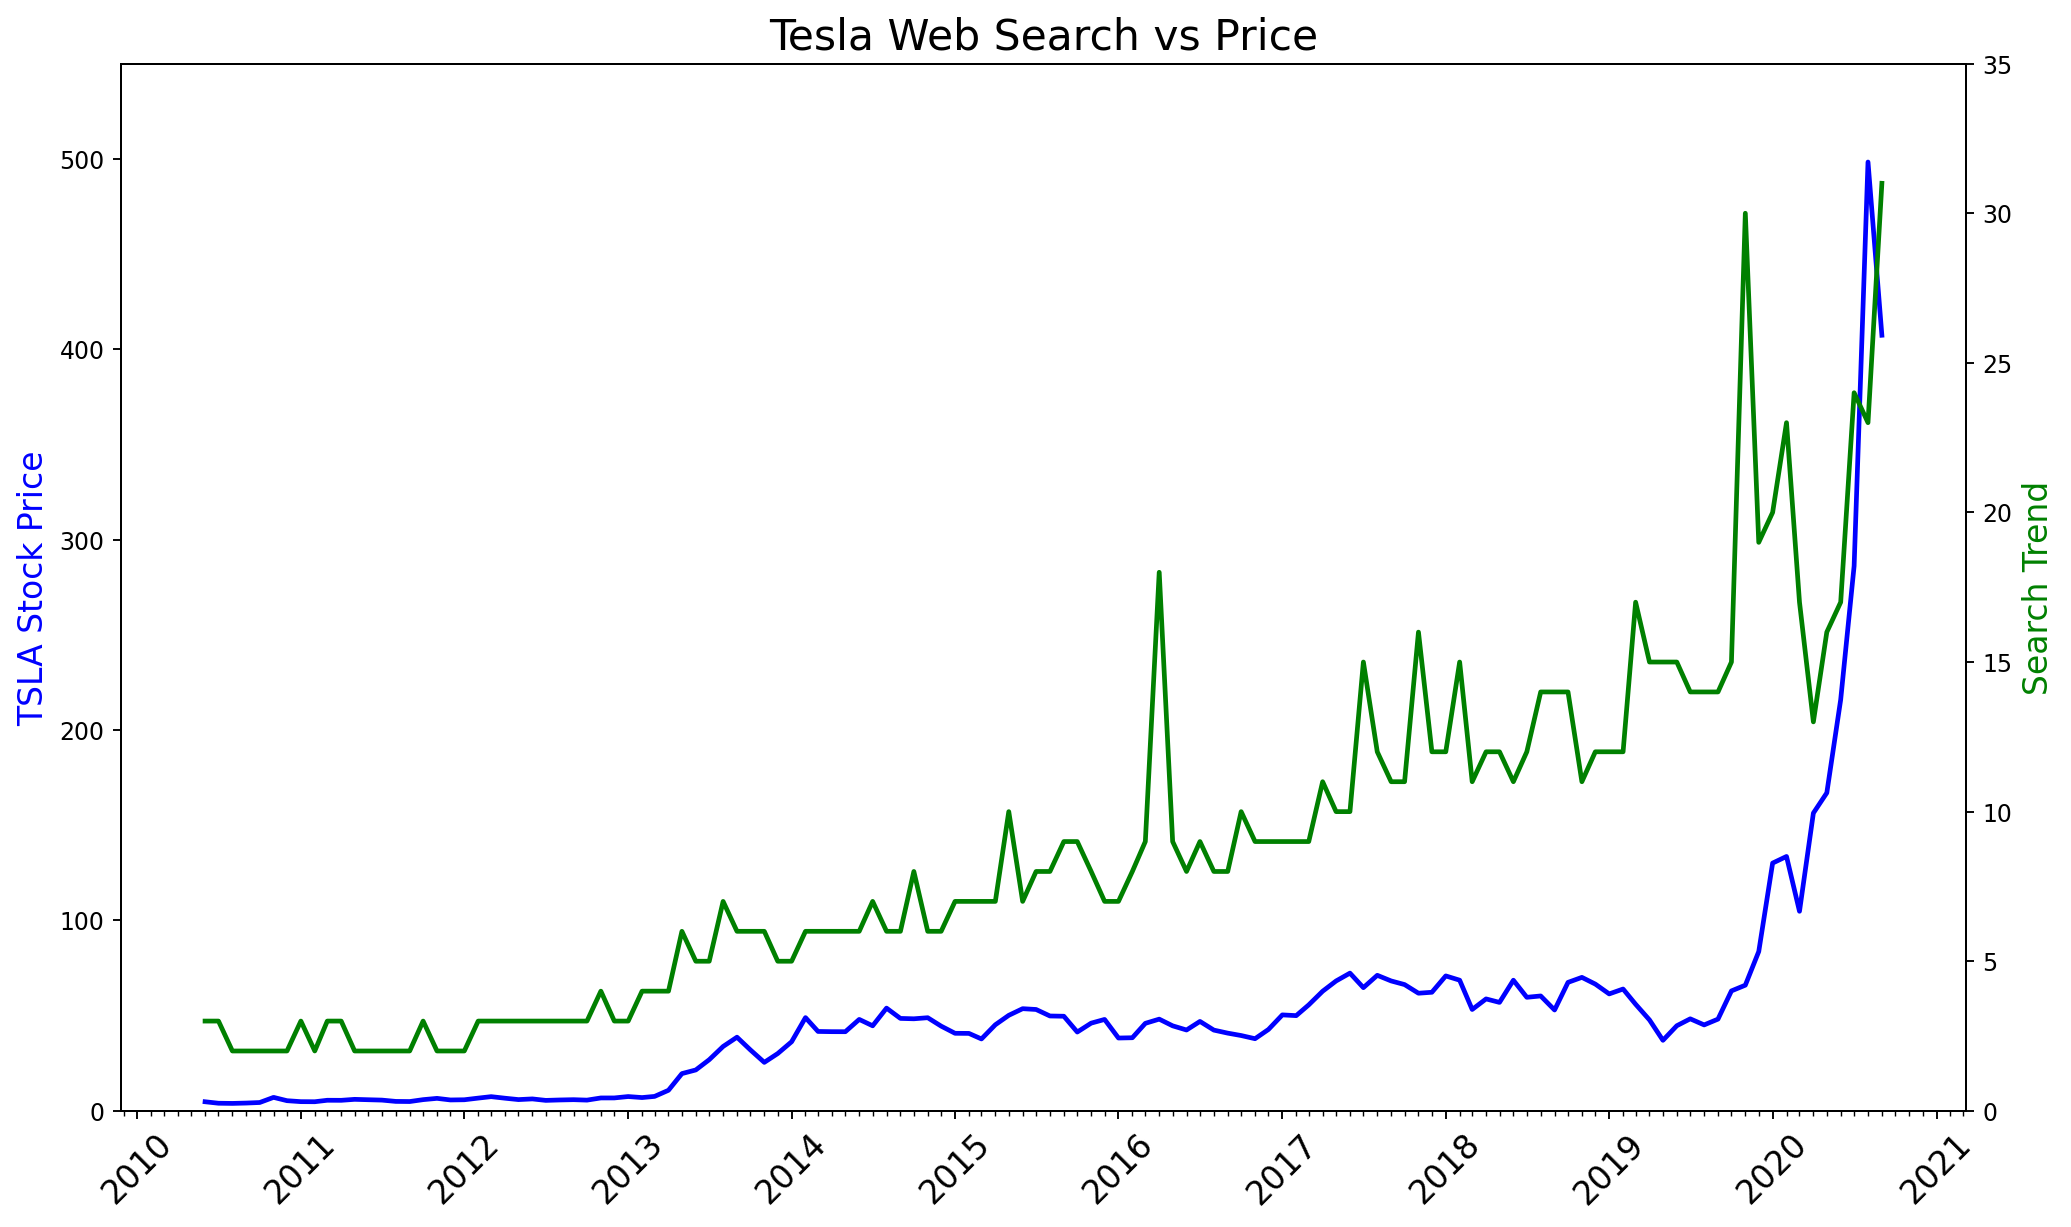

In [37]:
plt.figure(figsize=(14,8),dpi=170)
plt.xticks(fontsize=14,rotation=45)
plt.title('Tesla Web Search vs Price',fontsize=18)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('TSLA Stock Price',color = 'b',fontsize=14)
ax2.set_ylabel('Search Trend',color = 'g',fontsize=14)
ax1.set_ylim(0,550)
ax2.set_ylim(0,35)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_format)
ax1.xaxis.set_minor_locator(months)
ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE,'b',linewidth=2)
ax2.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH,'g',linewidth=2)

### Bitcoin (BTC) Price v.s. Search Volume

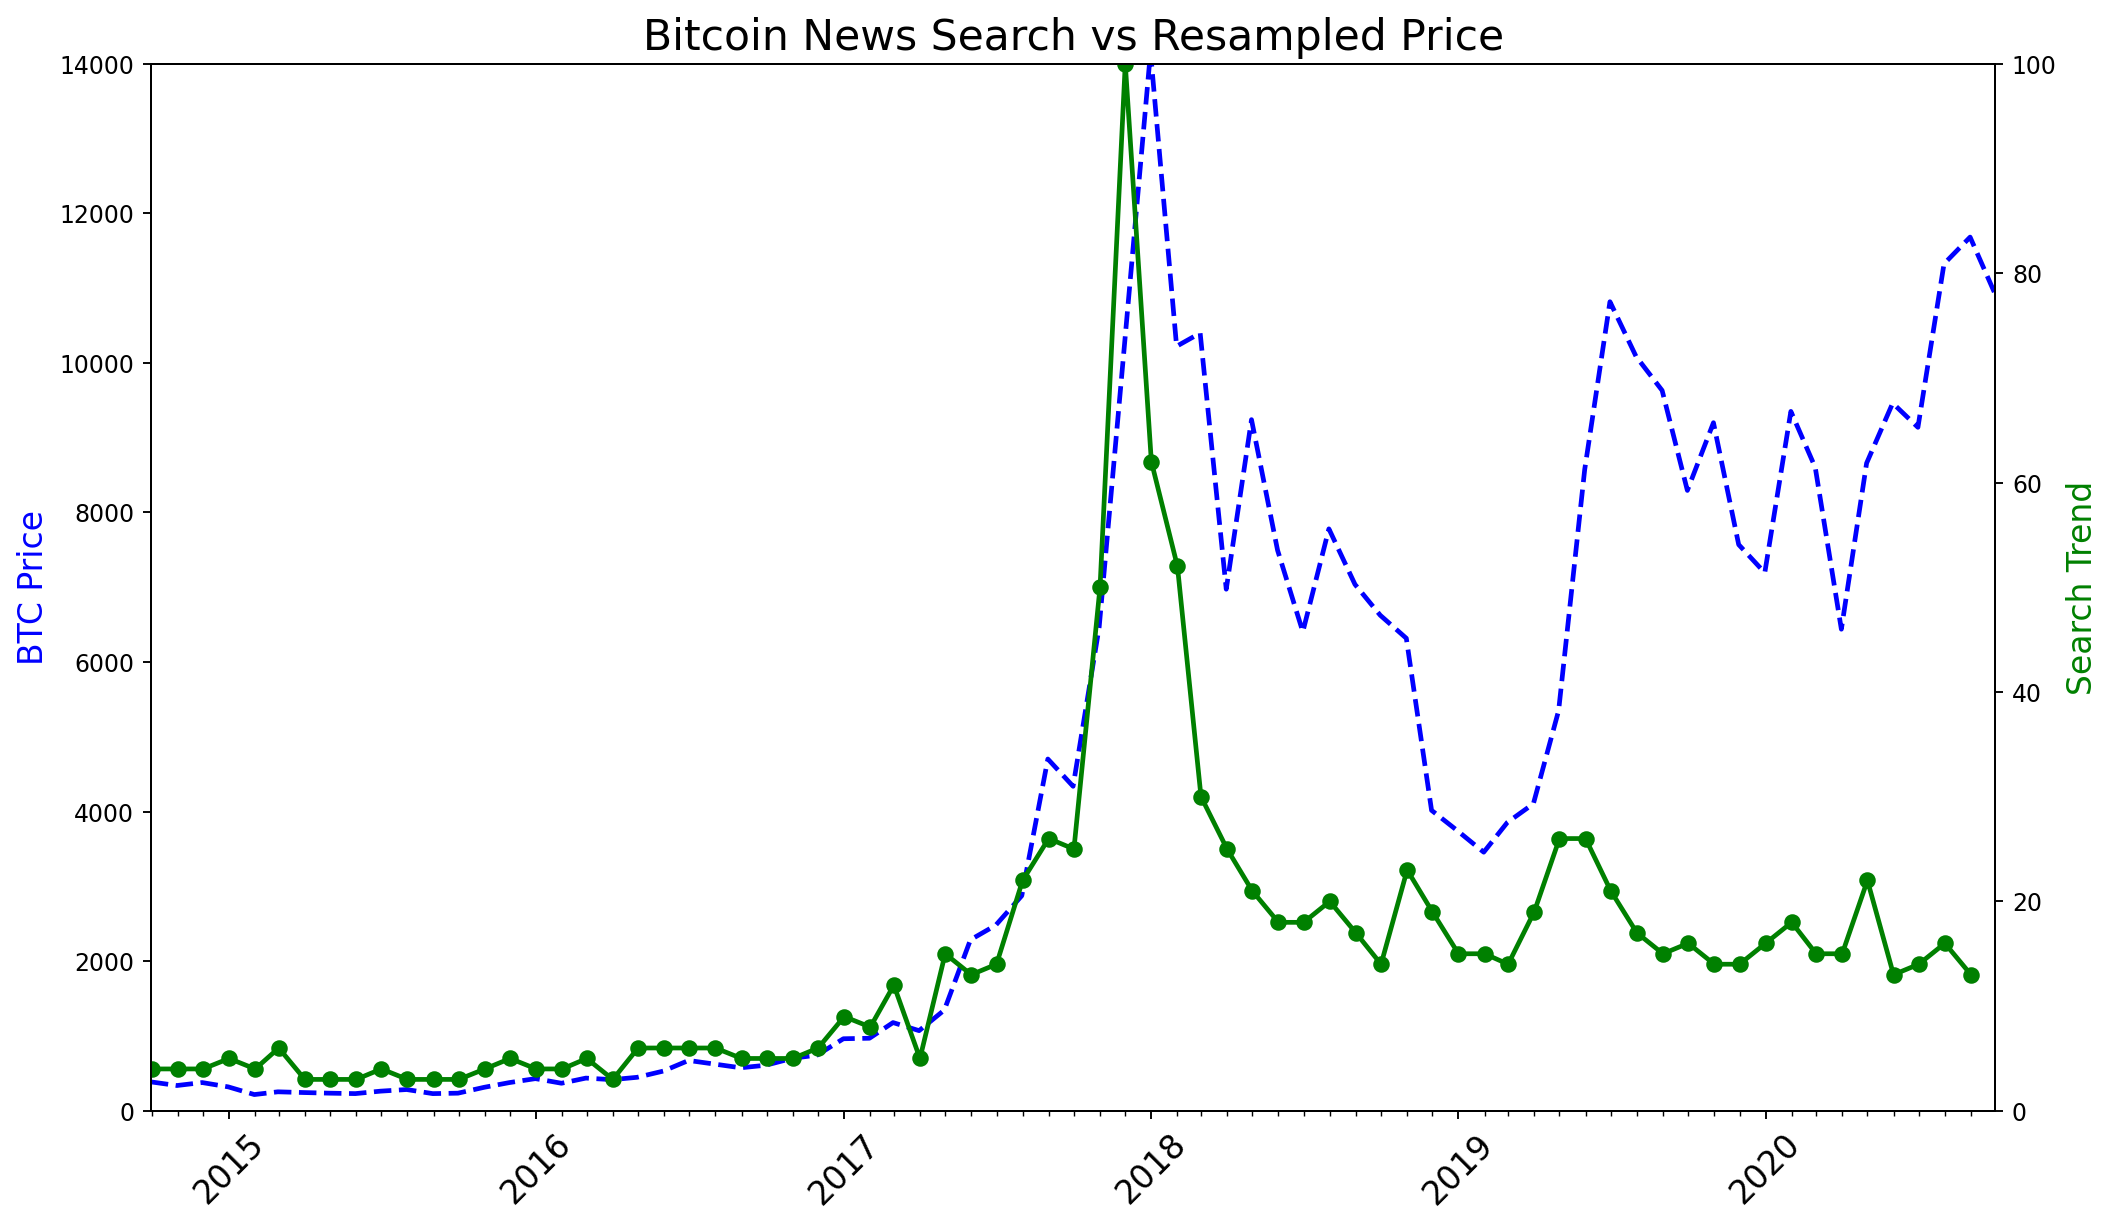

In [38]:
plt.figure(figsize=(14,8),dpi=170)
plt.xticks(fontsize=14,rotation=45)
plt.title('Bitcoin News Search vs Resampled Price',fontsize=18)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('BTC Price',color = 'b',fontsize=14)
ax2.set_ylabel('Search Trend',color = 'g',fontsize=14)
ax1.set_ylim(0,14000)
ax2.set_ylim(0,100)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_format)
ax1.xaxis.set_minor_locator(months)
ax1.plot(df_btc_monthly.index,df_btc_monthly.CLOSE,'b',linewidth=2,linestyle='--')
ax2.plot(df_btc_search.MONTH,df_btc_search.BTC_NEWS_SEARCH,'g',linewidth=2,marker='o')

### Unemployment Benefits Search vs. Actual Unemployment in the U.S.

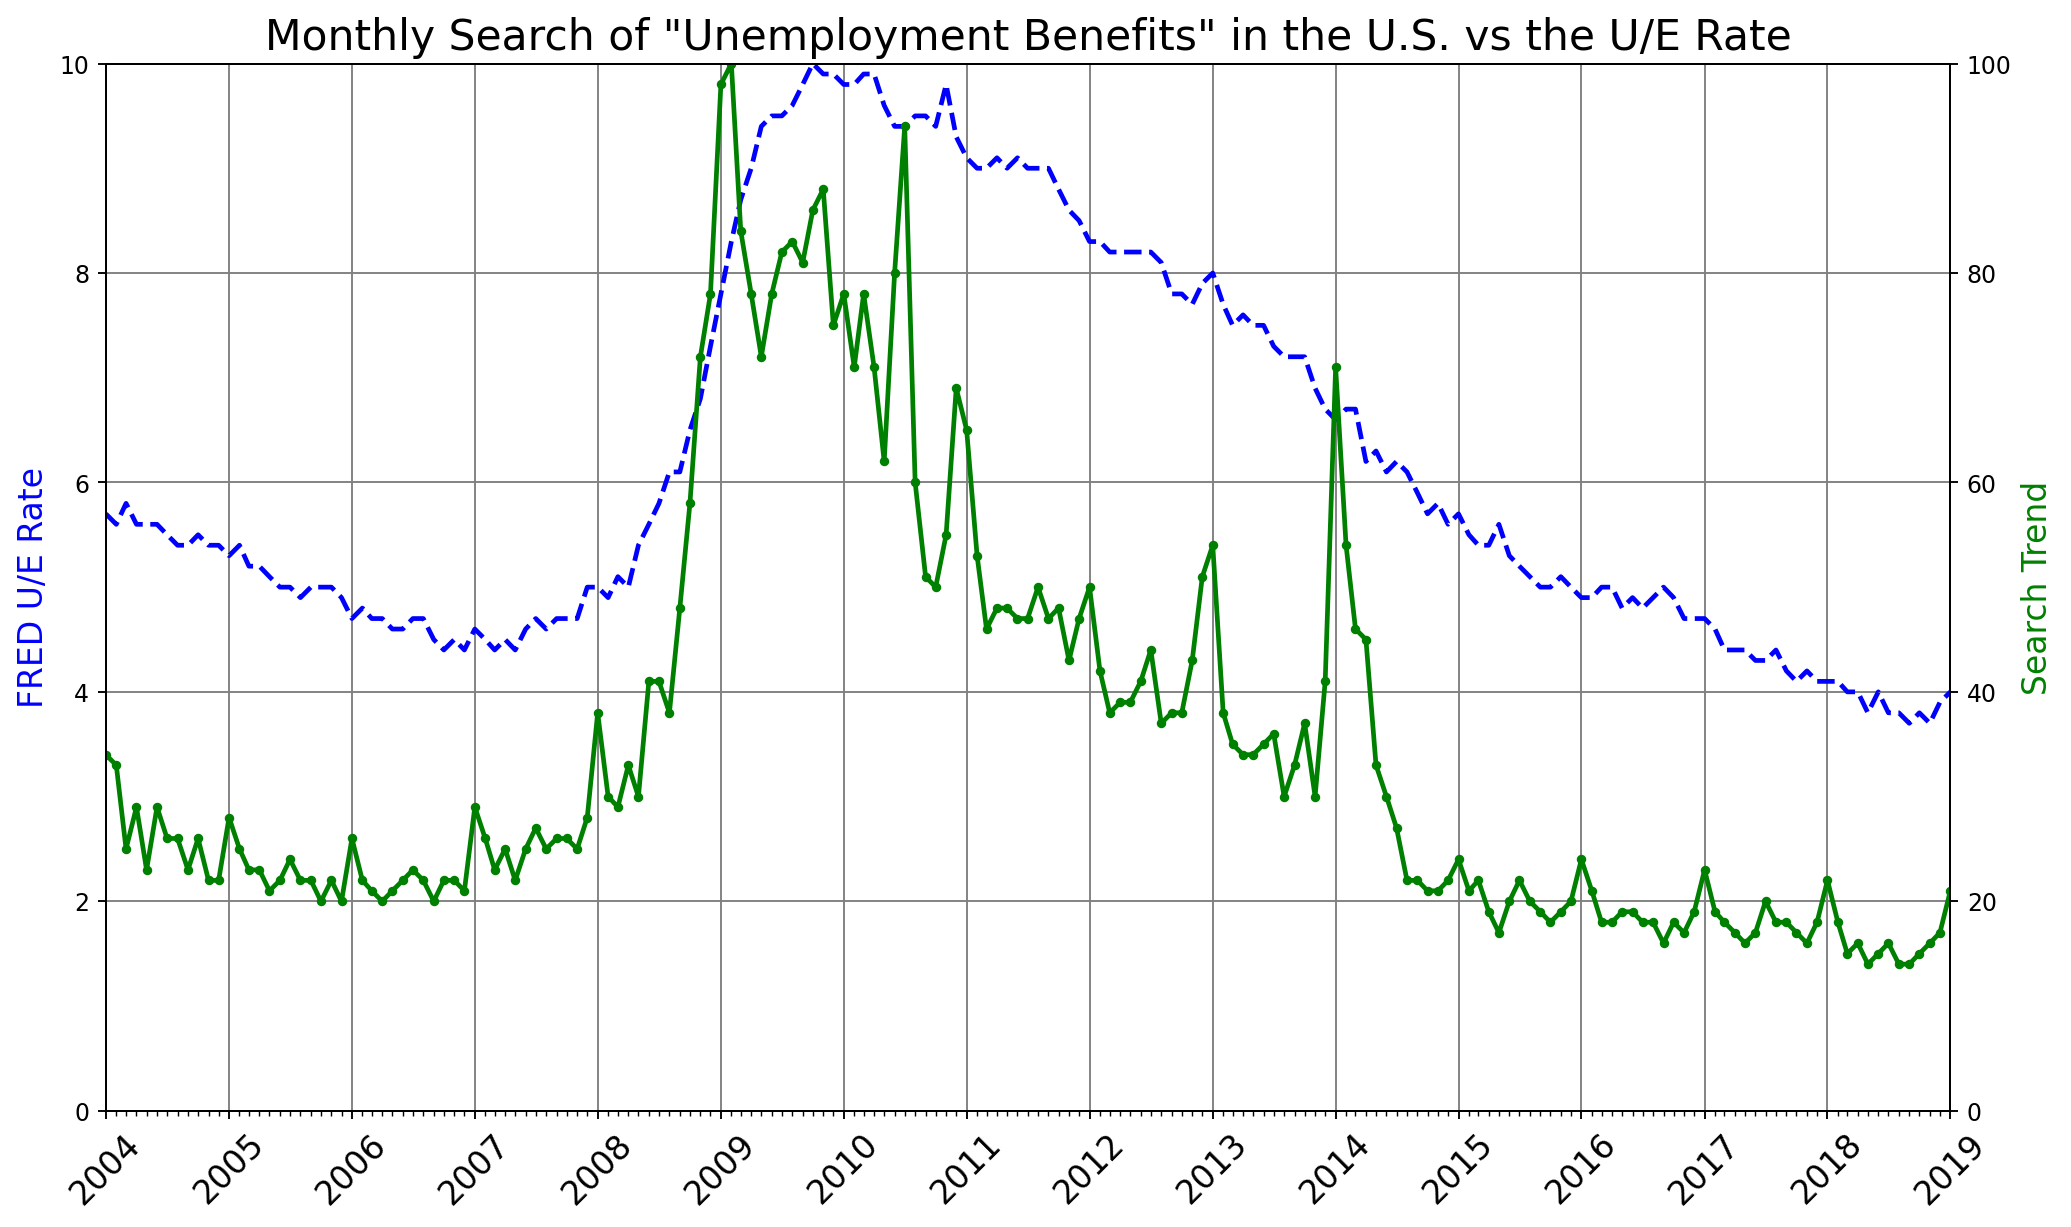

In [39]:
plt.figure(figsize=(14,8),dpi=170)
plt.xticks(fontsize=14,rotation=45)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate',fontsize=18)
plt.grid(color='grey')
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('FRED U/E Rate',color = 'b',fontsize=14)
ax2.set_ylabel('Search Trend',color = 'g',fontsize=14)
ax1.set_ylim(0,10)
ax2.set_ylim(0,100)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_format)
ax1.xaxis.set_minor_locator(months)
ax1.plot(df_unemployment.MONTH,df_unemployment.UNRATE,'b',linewidth=2,linestyle='--')
ax2.plot(df_unemployment.MONTH,df_unemployment.UE_BENEFITS_WEB_SEARCH,'g',linewidth=2,marker='.')

#### 6-month rolling average for the web searches

In [40]:
df_un_smth = df_unemployment.UE_BENEFITS_WEB_SEARCH.rolling(window=6).mean()

In [41]:
df_unrate_smth = df_unemployment.UNRATE.rolling(window=6).mean()

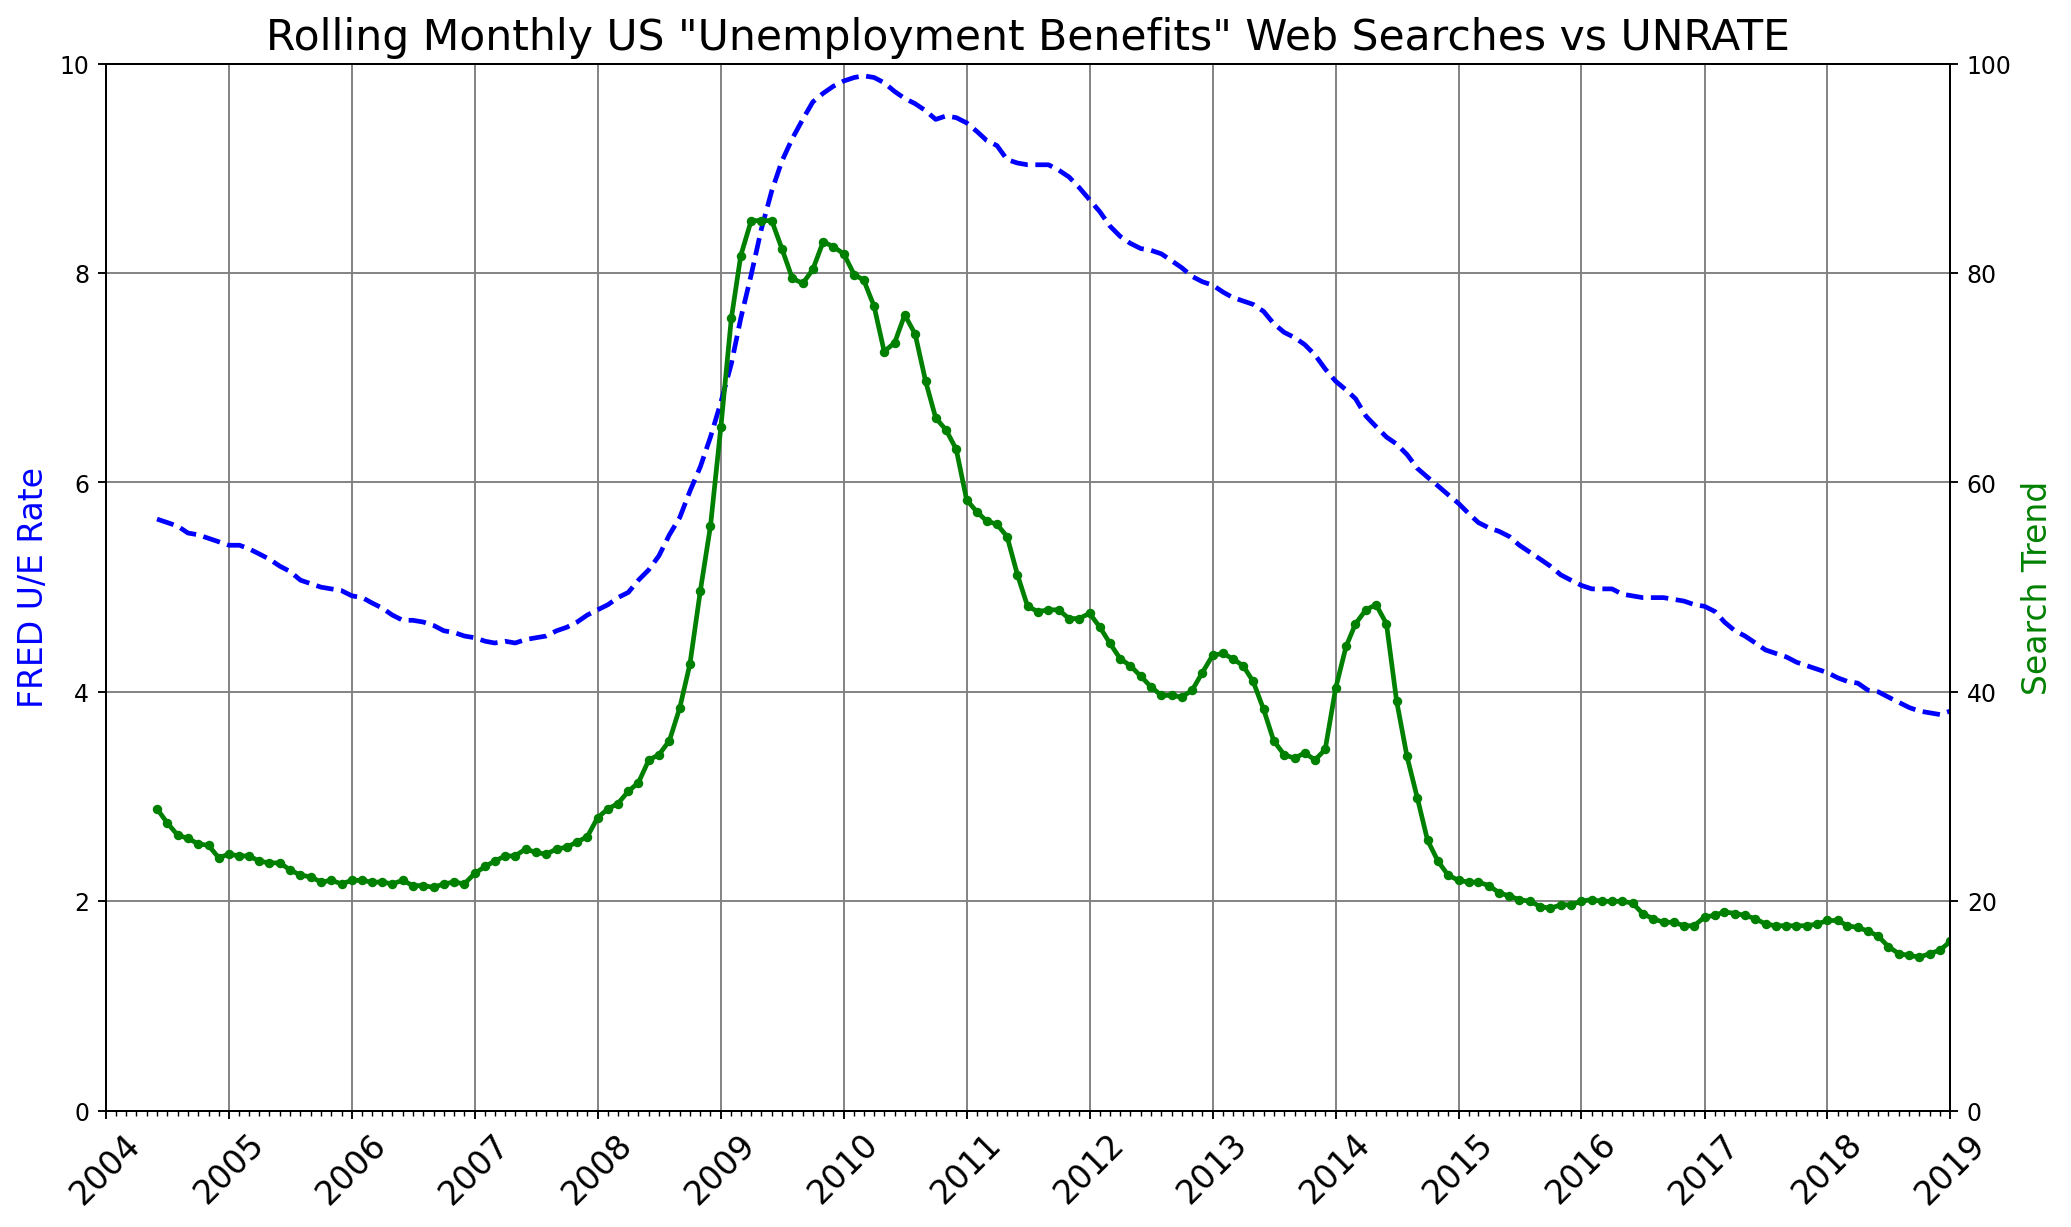

In [42]:
plt.figure(figsize=(14,8),dpi=170)
plt.xticks(fontsize=14,rotation=45)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE',fontsize=18)
plt.grid(color='grey')
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('FRED U/E Rate',color = 'b',fontsize=14)
ax2.set_ylabel('Search Trend',color = 'g',fontsize=14)
ax1.set_ylim(0,10)
ax2.set_ylim(0,100)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_format)
ax1.xaxis.set_minor_locator(months)
ax1.plot(df_unemployment.MONTH,df_unrate_smth,'b',linewidth=2,linestyle='--')
ax2.plot(df_unemployment.MONTH,df_un_smth,'g',linewidth=2,marker='.')

### Including 2020 in Unemployment Charts

In [43]:
df_ue_benefits_vs_rate = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

In [44]:
df_ue_benefits_vs_rate.tail()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
195,2020-04,100,14.7
196,2020-05,63,13.3
197,2020-06,53,11.1
198,2020-07,54,10.2
199,2020-08,50,8.4


In [45]:
df_ue_benefits_vs_rate.shape

(200, 3)

In [46]:
df_ue_benefits_vs_rate.MONTH = pd.to_datetime(df_ue_benefits_vs_rate.MONTH)

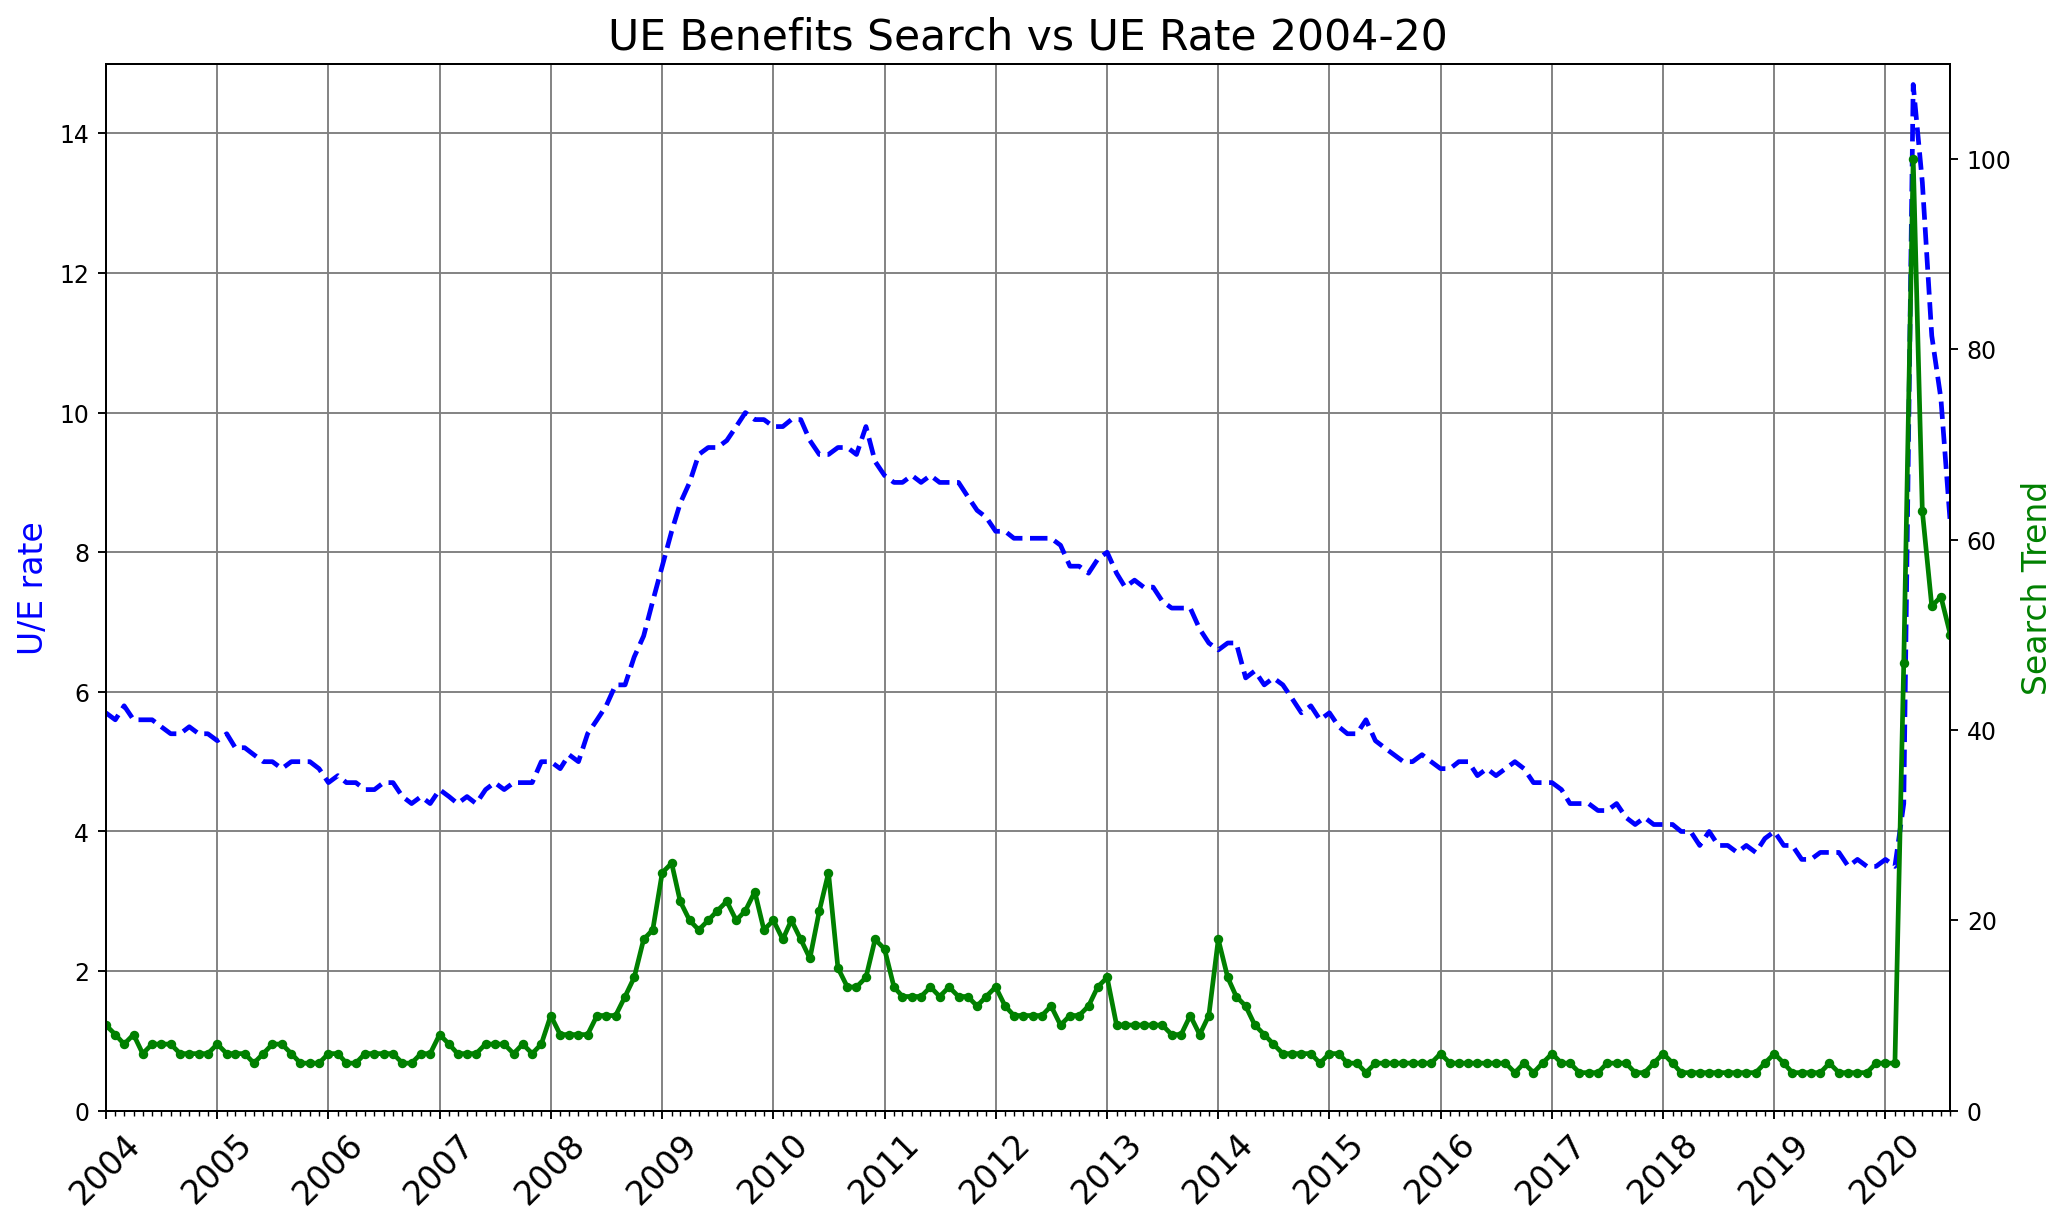

In [47]:
plt.figure(figsize=(14,8),dpi=170)
plt.xticks(fontsize=14,rotation=45)
plt.title('UE Benefits Search vs UE Rate 2004-20',fontsize=18)
plt.grid(color='grey')
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('U/E rate',color = 'b',fontsize=14)
ax2.set_ylabel('Search Trend',color = 'g',fontsize=14)
ax1.set_ylim(0,15)
ax2.set_ylim(0,110)
ax1.set_xlim([df_ue_benefits_vs_rate.MONTH.min(), df_ue_benefits_vs_rate.MONTH.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_format)
ax1.xaxis.set_minor_locator(months)
ax1.plot(df_ue_benefits_vs_rate.MONTH,df_ue_benefits_vs_rate.UNRATE,'b',linewidth=2,linestyle='--')
ax2.plot(df_ue_benefits_vs_rate.MONTH,df_ue_benefits_vs_rate.UE_BENEFITS_WEB_SEARCH,'g',linewidth=2,marker='.')